# Classification Exercises

## Data Acquisition

## 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.


In [1]:
from pydataset import data
import pandas as pd
import numpy as np

In [2]:
df_iris = data('iris')

* print the first 3 rows

In [3]:
print(df_iris.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


* print the number of rows and columns (shape)

In [4]:
print(df_iris.shape)

(150, 5)


* print the column names

In [5]:
print(df_iris.columns.values)

['Sepal.Length' 'Sepal.Width' 'Petal.Length' 'Petal.Width' 'Species']


* print the data type of each column

In [6]:
print(df_iris.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


* print the summary statistics for each of the numeric variables

In [7]:
print(df_iris.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## 5. Read the data from this google sheet into a dataframe, df_google.

In [8]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)


* print the first 3 rows

In [9]:
print(df_google.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


* print the number of rows and columns (shape)

In [10]:
print(df_google.shape)

(891, 12)


* print the column names

In [11]:
print(df_google.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


* print the data type of each column

In [12]:
print(df_google.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


* print the summary statistics for each of the numeric variables

In [13]:
print(df_google.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [14]:
df_excel = pd.read_excel('train.xlsx')

* assign the first 100 rows to a new dataframe, df_excel_sample

In [15]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


* print the number of rows of your original dataframe

In [16]:
print(len(df_excel))

891


* print the first 5 column names

In [17]:
print(df_excel.columns.values[:5])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex']


* print the column names that have a data type of object

In [18]:
print(df_excel.select_dtypes(include='object').columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


* compute the range for each of the numeric variables.

In [19]:
df_range = (df_excel.select_dtypes(exclude='object').max()) - (df_excel.select_dtypes(exclude='object').min())
print(df_range)

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64


# Data Preparation

In [20]:
import acquire
import pandas as pd

## Using the Iris Data

### 1. Use the function defined in acquire.py to load the iris data.

In [21]:
iris_df = acquire.get_iris_data()
iris_df

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2
5,1,setosa,6,5.4,3.9,1.7,0.4
6,1,setosa,7,4.6,3.4,1.4,0.3
7,1,setosa,8,5.0,3.4,1.5,0.2
8,1,setosa,9,4.4,2.9,1.4,0.2
9,1,setosa,10,4.9,3.1,1.5,0.1


### 2. Drop the species_id and measurement_id columns.

In [22]:
dropped_col = ['species_id', 'measurement_id']
iris_df = iris_df.drop(columns=dropped_col)
iris_df

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


### 3. Rename the species_name column to just species.

In [23]:
iris_df = iris_df.rename(columns={'species_name':'species'})
iris_df

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


### 4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [24]:
dummy_iris = pd.get_dummies(iris_df['species'], drop_first=True)
iris_df = pd.concat([iris_df, dummy_iris], axis=1)
iris_df

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


## 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [25]:
def prep_iris(df):
    '''This function will drop duplicate observations, drop 'species_id' and 'measurement_id',
        rename the 'species_name' column to 'species', and create dummy variables for species. '''
    
    df = df.drop_duplicates()
    df = df.drop(columns=['species_id', 'measurement_id'])
    df = df.rename(columns={'species_name':'species'})
    dummy_iris = pd.get_dummies(df['species'], drop_first=True)
    df = pd.concat([df, dummy_iris], axis=1)
    return df

In [26]:
fresh_iris = acquire.get_iris_data()
prep_iris(fresh_iris)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


## Using the Titanic Dataset

### 1. Use the function defined in acquire.py to load the Titanic data.

In [27]:
titanic_df = acquire.get_titanic_data()
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


## 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [28]:
titanic_df = titanic_df.drop(columns=['deck', 'class', 'embarked', 'age'])
titanic_df

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1
887,887,1,1,female,0,0,30.0000,Southampton,1
888,888,0,3,female,1,2,23.4500,Southampton,0
889,889,1,1,male,0,0,30.0000,Cherbourg,1


## 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [29]:
dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], drop_first=True)
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


## 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [30]:
def prep_titanic(df):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'],
    and create dummy vars from sex and embark_town. 
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

fresh_df = acquire.get_titanic_data()
prep_titanic(fresh_df)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


## Using Telco Data

## 1. Use the function defined in acquire.py to load the Telco data.

In [31]:
telco_df = acquire.get_telco_data()
telco_df
# Instructor answer:
#telco_df.head().T

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,Mailed check,One year,DSL
1,1,1,2,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Mailed check,Month-to-month,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Electronic check,Month-to-month,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Mailed check,Month-to-month,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,2,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,Mailed check,One year,DSL
7039,2,1,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Electronic check,Month-to-month,Fiber optic
7040,1,1,2,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Mailed check,Month-to-month,DSL
7041,1,3,2,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Mailed check,Two year,DSL


In [32]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

## 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [33]:
telco_df = telco_df.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
telco_df
#Instructor Answer:
# use crosstab to check values

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,Mailed check,One year,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,Mailed check,Month-to-month,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.90,280.85,Yes,Electronic check,Month-to-month,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Mailed check,Month-to-month,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,Yes,No,No,No,55.15,742.9,No,Mailed check,One year,DSL
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,No,No,Yes,Yes,85.10,1873.7,Yes,Electronic check,Month-to-month,Fiber optic
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,50.30,92.75,No,Mailed check,Month-to-month,DSL
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,Yes,No,Yes,No,67.85,4627.65,No,Mailed check,Two year,DSL


## 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [34]:
dummy_df = pd.get_dummies(telco_df[['gender', 'partner', 'dependents', 'phone_service','multiple_lines', 'online_security', 'online_backup','device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing', 'churn', 'payment_type','contract_type', 'internet_service_type']], dummy_na=False, drop_first=True)
telco_df = pd.concat([telco_df, dummy_df], axis=1)
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,0,0,1,1,0,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,1,0,0,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,0,0,1,1,0,0,0
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,1,1,1,0,1,0,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,1,0,0,0,1,0,0,0,0
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,1,0,0,0,0,1,0,1,0,0


In [35]:
#Instructor answer:
telco_df.gender.map({'Female':1, 'Male': 0})

0       1
1       0
2       0
3       0
4       1
       ..
7038    1
7039    0
7040    0
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64

## 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco(df):
    '''This function removes duplicates, changes total_charges to float, 
       removes the columns 'internet_service_type_id', 'contract_type_id',
       and creates dummy variables for 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup','device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies','paperless_billing', 'churn', 'payment_type','contract_type', 'internet_service_type'.'''
    df = df.drop_duplicates()
    df['total_charges'] = df.total_charges.str.strip().replace('', np.nan, regex=True).dropna()
    df = df.total_charges.astype(float)
    df = df.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
    dummy_df = pd.get_dummies(df[['gender', 'partner', 'dependents', 'phone_service','multiple_lines', 'online_security', 'online_backup','device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing', 'churn', 'payment_type','contract_type']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

fresh_df = acquire.get_telco_data()
prep_telco(fresh_df)


## Split Data

In [42]:
from sklearn.model_selection import train_test_split
def split_data(df):#, target):
    '''This function takes a dataframe and returns the train, validate, and test dataframes.'''
    
    train_validate, test = train_test_split(df, test_size = .2, random_state=311)#, stratify=df[target])
    train, validate = train_test_split(train_validate, test_size = .3, random_state=311)#, stratify=df[target])
    
    return train, validate, test

## 1. Test split on iris data.

In [43]:
train, validate, test = split_data(iris_df)

In [44]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')


train -> (84, 7)
validate -> (36, 7)
test -> (30, 7)


## 2. Test on titanic data.

In [45]:
train, validate, test = split_data(titanic_df)

In [46]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (498, 12)
validate -> (214, 12)
test -> (179, 12)


## 3. Test on telco data.

In [47]:
train, validate, test = split_data(telco_df)

In [48]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 48)
validate -> (1691, 48)
test -> (1409, 48)


# Exploratory Analysis Exercises

## Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

In [49]:
import acquire
import pandas as pd
import numpy as np
import env
import prepare
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 1. Acquire, prepare & split your data.

In [50]:
iris = acquire.get_iris_data()
iris = prepare.prep_iris(iris)
train, validate, test = prepare.split_data(iris)

In [51]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
71,versicolor,6.1,2.8,4.0,1.3,1,0
55,versicolor,5.7,2.8,4.5,1.3,1,0
29,setosa,4.7,3.2,1.6,0.2,0,0
131,virginica,7.9,3.8,6.4,2.0,0,1
67,versicolor,5.8,2.7,4.1,1.0,1,0


### 2. Univariate Stats

In [52]:
col_cat = []
col_num = []

for col in train.columns[:-2]:
    print(col)
    if train[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(train[col].unique()) < 4:
            col_cat.append(col)
        else:
            col_num.append(col)    

species
sepal_length
sepal_width
petal_length
petal_width


In [53]:
col_cat

['species']

In [54]:
col_num

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

SEPAL_LENGTH
5.5    7
6.4    6
5.1    6
6.1    5
6.7    5
5.0    5
6.5    4
5.8    4
5.2    4
6.9    3
6.0    3
5.7    3
6.8    3
5.4    3
5.6    2
6.2    2
4.9    2
4.7    2
4.8    2
6.3    2
7.2    2
4.4    2
4.6    2
5.9    2
5.3    1
7.3    1
7.7    1
7.9    1
4.3    1
7.4    1
7.6    1
6.6    1
4.5    1
Name: sepal_length, dtype: int64
Axes(0.125,0.11;0.775x0.77)


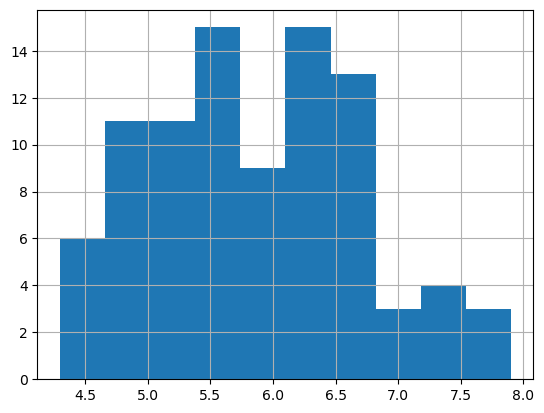


SEPAL_WIDTH
3.0    17
3.2    11
2.8     8
3.4     8
2.7     6
2.9     6
3.1     6
2.5     5
3.5     4
2.6     3
3.3     3
3.7     2
3.8     2
2.4     2
2.3     2
3.6     1
4.1     1
4.4     1
2.2     1
4.2     1
Name: sepal_width, dtype: int64
Axes(0.125,0.11;0.775x0.77)


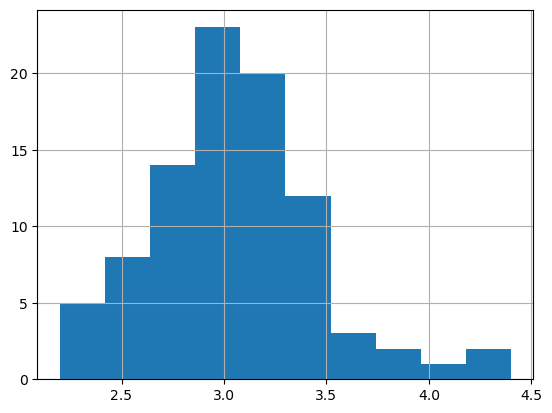


PETAL_LENGTH
1.5    9
1.4    9
1.3    5
5.1    5
4.5    5
1.6    4
4.6    3
4.7    3
4.8    3
5.5    3
3.9    3
4.0    3
5.6    3
5.8    2
5.3    2
4.3    2
6.1    2
4.4    2
5.2    2
4.9    2
5.7    2
3.5    1
6.6    1
1.1    1
1.2    1
6.4    1
4.1    1
1.7    1
6.0    1
4.2    1
5.0    1
6.3    1
3.8    1
5.9    1
3.6    1
3.0    1
3.7    1
Name: petal_length, dtype: int64
Axes(0.125,0.11;0.775x0.77)


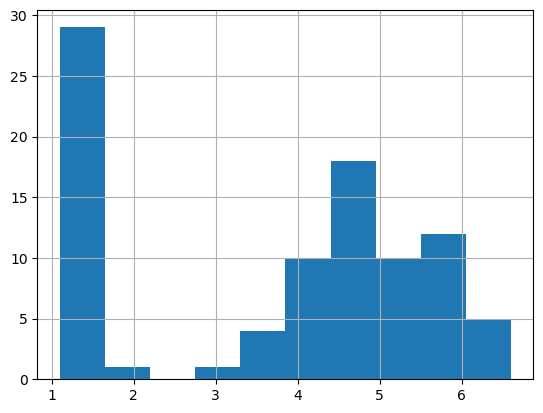


PETAL_WIDTH
0.2    18
1.8     9
1.5     8
1.3     8
2.3     6
1.4     5
0.1     4
0.3     4
0.4     4
2.1     4
1.9     4
1.0     3
2.0     3
1.1     3
1.2     3
1.6     2
2.4     1
1.7     1
Name: petal_width, dtype: int64
Axes(0.125,0.11;0.775x0.77)


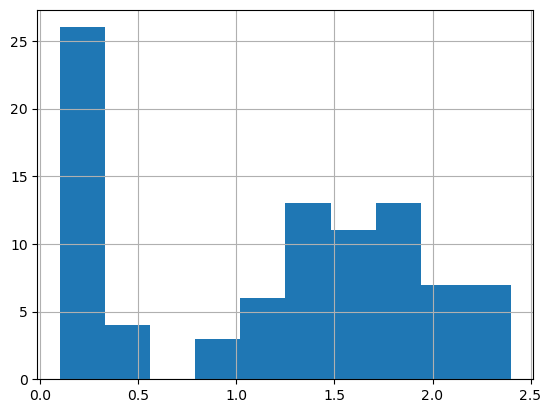

In [55]:
for col in col_num:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].hist())
    plt.show()
    print()

* For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

SPECIES
virginica     31
setosa        30
versicolor    29
Name: species, dtype: int64
virginica     0.344444
setosa        0.333333
versicolor    0.322222
Name: species, dtype: float64


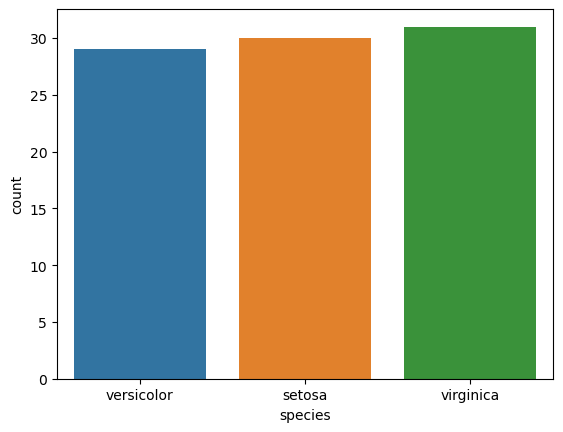

In [56]:
for col in col_cat:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].value_counts(normalize = True))
    sns.countplot(x=col, data=train)
    plt.show()
    print()

* Document takeaways & any actions.

Categorical:

* The data is nearly evenly split between the three species.

Numerical:

* sepal length appears to be bimodal
* sepal width has a somewhat normal distribution
* petal length and petal width do not have a normal distribution, but appear to have a similar split.

### 3. Bivariate Stats

* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

Axes(0.125,0.11;0.775x0.77)


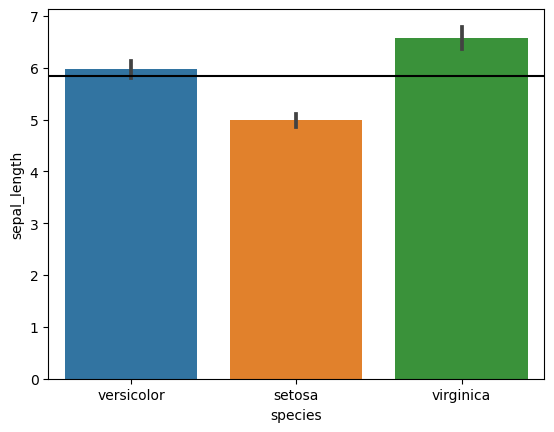

Axes(0.125,0.11;0.775x0.77)


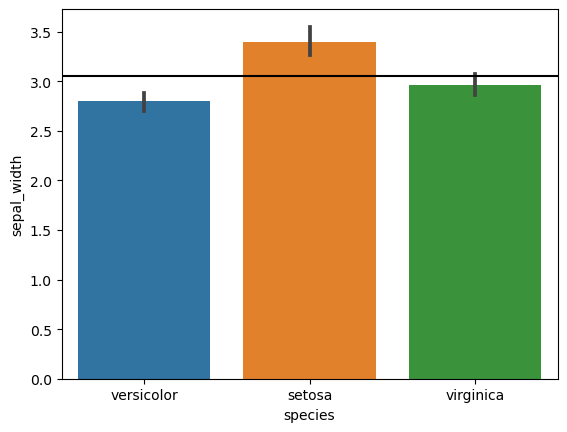

Axes(0.125,0.11;0.775x0.77)


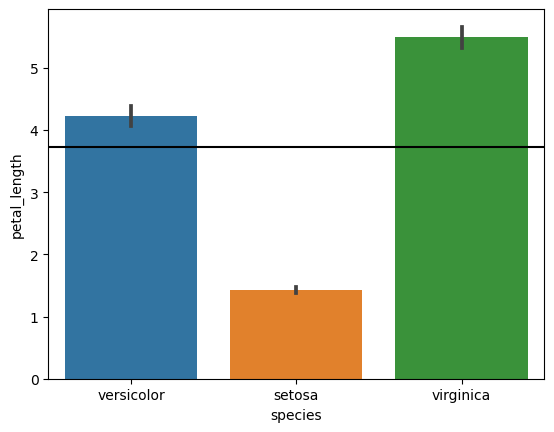

Axes(0.125,0.11;0.775x0.77)


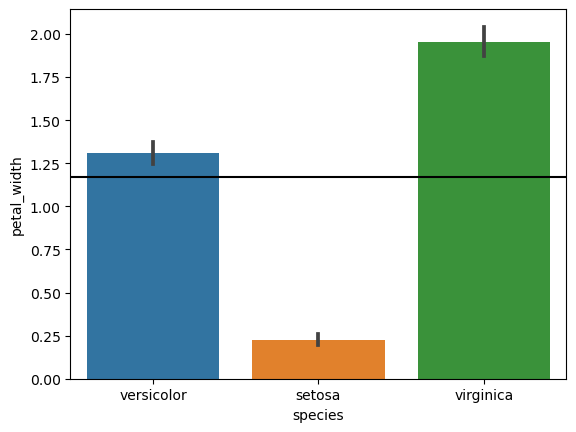

In [63]:
for col in col_num:
    mean_value = train[col].mean()
    print(sns.barplot(data=train, x='species',y=col))
    plt.axhline(y=mean_value, color='black', label='Mean')
    plt.show()

* For each measurement type, compute the descriptive statistics for each species.

* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

* Document takeaways & any actions.

### 4. Multivariate Stats

* Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

* Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

* Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

* Document takeaways and any actions.

## Part II

## Explore your titanic dataset more completely.